# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

# Preprocessing and evaluation metrics

from sklearn.preprocessing import Normalizer, scale, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score  
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error 

# Deep Learning libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import mean_squared_error, categorical_crossentropy, cosine_similarity
from tensorflow.keras.regularizers import l1, l2

# For Transfer Learning
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.layers.advanced_activations import LeakyReLU

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [ ]:
# Load Full Dataset

train = pd.read_csv('drive/My Drive/ECE657A/train.csv')
test = pd.read_csv('drive/My Drive/ECE657A/testX.csv')
df_train = train.copy()
df_test = test.copy()

# Seperate ID numbers and target features from dataset

X = df_train.iloc[:, 2:]
y = df_train['Label']

df_test1 = df_test.iloc[:, 1:]

print(X.shape)
print(y.shape)
print(df_test1.shape)

(60000, 784)
(60000,)
(10000, 784)


# Data Preprocessing

## Change Image Input Channels for Loading into Pre-Trained Models

In [ ]:
# Change number of input channels in dataset
X = np.dstack([X] * 3)
df_test1 = np.dstack([df_test1] * 3)

print(X.shape)
print(df_test1.shape)

(60000, 784, 3)
(10000, 784, 3)


## Reshape the Images

* Reshape 1D image vectors into 28X28X1 3D matrices before feeding them to a CNN
* Keras wants an extra dimension in end for grayscale images

In [ ]:
# For Built Models
X = X.values.reshape((-1, 28, 28, 1))
df_test2 = df_test1.values.reshape((-1, 28, 28, 1))

print(X.shape)
print(df_test2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# For Pretrained Models
X = X.reshape((-1, 28, 28, 3))
df_test2 = df_test1.reshape((-1, 28, 28, 3))

print(X.shape)
print(df_test2.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


## Normalize the dataset

* Data samples need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we also acheive Zero Mean and Unit Variance.

* Normalization is carried out as follows: 
> x = (x - min) / (max - min) ; Here min= 0 and max= 255

In [ ]:
X = X.astype("float32")/255

df_test2 = df_test2.astype("float32")/255

## Resize the images width and height

In [ ]:
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((71,71))) for im in X])
df_test2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((71,71))) for im in df_test2])

# Display the new shape

print(X.shape)
print(df_test2.shape)

(60000, 71, 71, 3)
(10000, 71, 71, 3)


## One Hot encoding of target variables

In [ ]:
# Convert Target variables into one hot encoded targets

y = df_train['Label']
y = to_categorical(y, num_classes=5)
print(y.shape)



(60000, 5)


## Split Train Dataset to Train and Validation set

In [ ]:
#For Conventional CNN and 
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(48000, 5)
(12000, 28, 28, 1)
(12000, 5)


In [ ]:
#For Autoencoders
AE_x_train, AE_x_val, g_train, g_val = train_test_split(X, X, test_size = 0.2, random_state= 42)
print(AE_x_train.shape)
print(g_train.shape)
print(AE_x_val.shape)
print(g_val.shape)

(48000, 28, 28, 1)
(48000, 28, 28, 1)
(12000, 28, 28, 1)
(12000, 28, 28, 1)


In [ ]:
# For Pre Trained Models
tr_x_train, tr_x_val, tr_y_train, tr_y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)

print(tr_x_train.shape)
print(tr_y_train.shape)
print(tr_x_val.shape)
print(tr_y_val.shape)

(48000, 71, 71, 3)
(48000, 5)
(12000, 71, 71, 3)
(12000, 5)


# Conventional Convolutional Neural Network

## Building a CNN

In [ ]:
# Build a ConvNet

cnn_model = tf.keras.Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu', input_shape= (28,28,1) ))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu'))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 64, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu' ))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last'))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))


cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(5, activation='softmax'))


## Compile the CNN model

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compile
cnn_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

## Fit the model

In [ ]:
batches = 128
epoch = 50
lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model_fitting = cnn_model.fit(x_train, y_train, batch_size = batches, epochs = epoch, validation_data = (x_val, y_val), 
                          verbose=1, steps_per_epoch=x_train.shape[0] // batches, callbacks = [lr])

Epoch 1/50
375/375 [==============================] - 5s 12ms/step - loss: 0.7982 - accuracy: 0.6886 - val_loss: 1.4563 - val_accuracy: 0.4172 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.5205 - accuracy: 0.7908 - val_loss: 0.3995 - val_accuracy: 0.8362 - lr: 9.0000e-04
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4616 - accuracy: 0.8145 - val_loss: 0.3892 - val_accuracy: 0.8407 - lr: 8.1000e-04
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4278 - accuracy: 0.8313 - val_loss: 0.3539 - val_accuracy: 0.8560 - lr: 7.2900e-04
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4043 - accuracy: 0.8410 - val_loss: 0.3377 - val_accuracy: 0.8618 - lr: 6.5610e-04
Epoch 6/50
375/375 [==============================] - 4s 12ms/step - loss: 0.3842 - accuracy: 0.8470 - val_loss: 0.3665 - val_accuracy: 0.8476 - lr: 5.9049e-04
Epoch 7/50
375/375 [========================

## Plots



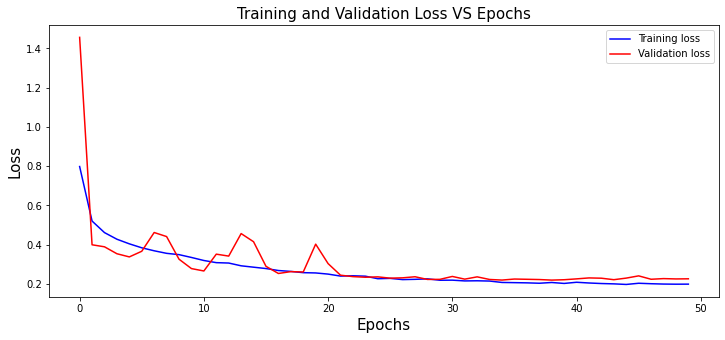

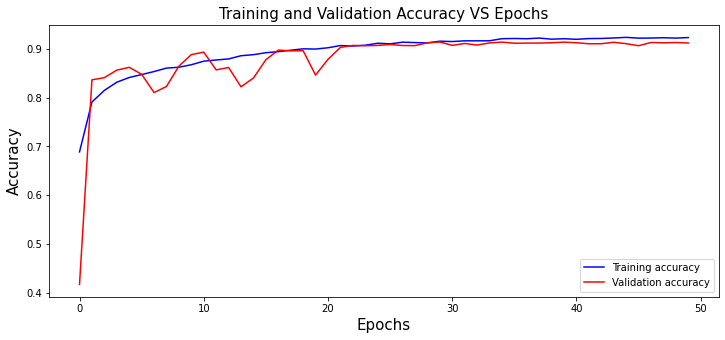

In [ ]:
accuracy = model_fitting.history['accuracy']
val_accuracy = model_fitting.history['val_accuracy']

loss = model_fitting.history['loss']
val_loss = model_fitting.history['val_loss']

epochs = range(len(accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()



## Generate predictions on test dataset

In [ ]:
# Generate predictions 

predictions = model.predict(df_test2)
print('predictions shape:', predictions.shape)

# COnvert predictions classes to integer vectors
preds = np.argmax(predictions, axis=1)
print(preds)


predictions shape: (10000, 5)
[3 4 1 ... 3 2 2]


## Create submissions for Kaggle

In [ ]:
subm1 = pd.DataFrame(test.iloc[:,0])
subm1 = subm1.join(pd.DataFrame(data = preds, columns =['Label']))
subm1.to_csv('drive/My Drive/ECE657A/outs/cnn/vers1_final.csv', index=False)

# Convolutional AutoEncoder

## Parameters

In [ ]:
inChannel = 1
a, b = 28, 28
input_img = Input(shape = (a, b, inChannel))
num_classes = 5

## Encoder & Decoder

In [ ]:
def encoder(input_img):

    #encoder
    #input layer = 28 x 28 x 1 (wide and thin)

    # First CONV block
    conv1 = Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu')(input_img) #28 x 28 x 32
    bn1 = BatchNormalization()(conv1)
    conv1 = Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu')(bn1) #28 x 28 x 32
    bn1 = BatchNormalization()(conv1)
    pool1 = MaxPool2D(pool_size=(2, 2))(bn1) #14 x 14 x 32


    # Second CONV block
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(pool1) #14 x 14 x 64
    bn2 = BatchNormalization()(conv2)
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn2) #14 x 14 x 64
    bn2 = BatchNormalization()(conv2)
    pool2 = MaxPool2D(pool_size=(2, 2))(bn2) #7 x 7 x 64
    drop1 = Dropout(0.25)(pool2)


    # Third CONV block
    conv3 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(drop1) #7 x 7 x 128 (small and thick)
    bn3 = BatchNormalization()(conv3)
    conv3 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn3) #7 x 7 x 128 (small and thick)
    bn3 = BatchNormalization()(conv3)
    # pool3 = MaxPool2D(pool_size=(2, 2))(bn3)
    drop2 = Dropout(0.25)(bn3)

     

    return drop2

def decoder(encoded):    
    #decoder

    # First CONV block
    conv1 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(encoded) #7 x 7 x 128
    bn1 = BatchNormalization()(conv1)
    conv1 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn1) #7 x 7 x 128
    bn1 = BatchNormalization()(conv1)
    up1 = UpSampling2D((2,2))(bn1)

    # Second CONV block
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(up1)
    bn2 = BatchNormalization()(conv2)
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn2)
    bn2 = BatchNormalization()(conv2)
    up2 = UpSampling2D((2,2))(bn2) #14 x 14 x 64

    # Third CONV block
    conv3 = Conv2D(filters = 32, kernel_size=(3, 3), padding='same', 
                 data_format='channels_last', activation='relu')(up2)
    bn3 = BatchNormalization()(conv3)
    conv3 = Conv2D(filters = 32, kernel_size=(3, 3), padding='same', 
                 data_format='channels_last', activation='relu')(bn3)
    bn3 = BatchNormalization()(conv3)
    # up3 = UpSampling2D((2,2))(bn3) # 28 x 28 x 32
    
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(bn3) # 28 x 28 x 1

    return decoded

## Compile the model

In [ ]:
autoencoder = Model(input_img, decoder(encoder(input_img)))

autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496 

## Train the model


In [ ]:
batches = 128
epoch = 100


# Train autoencoder
autoencoder_train = autoencoder.fit(AE_x_train, g_train, batch_size= batches, epochs=epoch, verbose=1, validation_data=(AE_x_val, g_val))


Epoch 1/100
375/375 [==============================] - 9s 24ms/step - loss: 0.0222 - val_loss: 0.0143
Epoch 2/100
375/375 [==============================] - 8s 23ms/step - loss: 0.0092 - val_loss: 0.0077
Epoch 3/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0070 - val_loss: 0.0050
Epoch 4/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 5/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 6/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 7/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 8/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 9/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 10/100
375/375 [==============================] - 9s 23ms/step - loss: 0.003

## Loss vs Epochs Plot

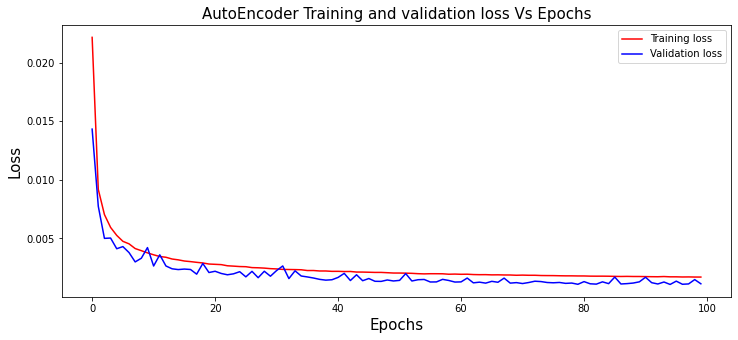

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize = (12,5))

plt.plot(epochs, loss, '-r', label='Training loss')
plt.plot(epochs, val_loss, '-b', label='Validation loss')
plt.xlabel('Epochs', fontsize= 15)
plt.ylabel('Loss', fontsize= 15)
plt.title('AutoEncoder Training and validation loss Vs Epochs', fontsize= 15)
plt.legend()
plt.show()

## Split the Train dataset again 



In [ ]:
AE_x_train, AE_x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)

print(AE_x_train.shape)
print(y_train.shape)
print(AE_x_val.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(48000, 5)
(12000, 28, 28, 1)
(12000, 5)


## Fully connected layer


In [ ]:
def fullyconn(enco):
    flat = Flatten()(enco)                          # Flatten the input

    den1 = Dense(512, activation='relu')(flat)      # First dense layer
    bn1 = BatchNormalization()(den1)
    drop1 = Dropout(0.5)(bn1)

    den2 = Dense(64, activation='relu')(drop1)        # Second dense layer
    bn2 = BatchNormalization()(den2)
    drop2 = Dropout(0.5)(bn2)

    out = Dense(num_classes, activation='softmax')(drop2)     # Output layer
    return out

## Create the Convolutional Autoencoder using the Encoder and Fully Connected Layer

In [ ]:
encode = encoder(input_img)
conv_ae = Model(input_img, fullyconn(encode))

for l1,l2 in zip(conv_ae.layers[:17], autoencoder.layers[0:17]):
    l1.set_weights(l2.get_weights())

## Compile and Train the Convolutional Autoencoder

In [ ]:
for layer in conv_ae.layers[0:17]:
    layer.trainable = False

# Optimizer
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )


conv_ae.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
conv_ae.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        1849

## Fit the model

In [ ]:
batches = 128
epoch = 30

# Learning Rate Decay

lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


classify_train = conv_ae.fit(x_train, y_train, batch_size= batches, epochs= epoch, verbose=1, validation_data=(x_val, y_val))


Epoch 1/30
375/375 [==============================] - 3s 7ms/step - loss: 0.6986 - accuracy: 0.7275 - val_loss: 0.4024 - val_accuracy: 0.8368
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.4944 - accuracy: 0.8016 - val_loss: 0.3693 - val_accuracy: 0.8497
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.4398 - accuracy: 0.8270 - val_loss: 0.3436 - val_accuracy: 0.8612
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.4063 - accuracy: 0.8408 - val_loss: 0.3282 - val_accuracy: 0.8685
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3732 - accuracy: 0.8560 - val_loss: 0.3158 - val_accuracy: 0.8717
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3555 - accuracy: 0.8621 - val_loss: 0.3196 - val_accuracy: 0.8721
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3363 - accuracy: 0.8712 - val_loss: 0.3070 - val_accuracy: 0.8771
Epoch 

## Plots

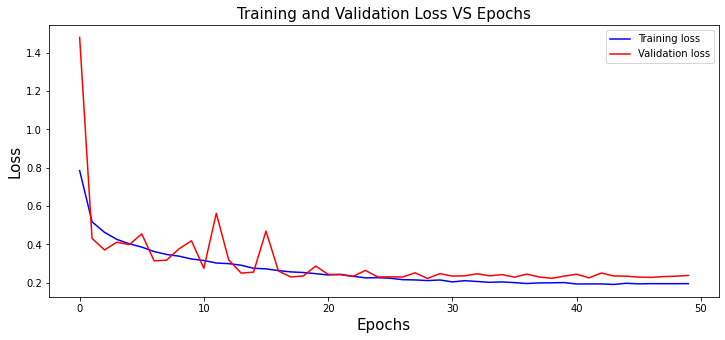

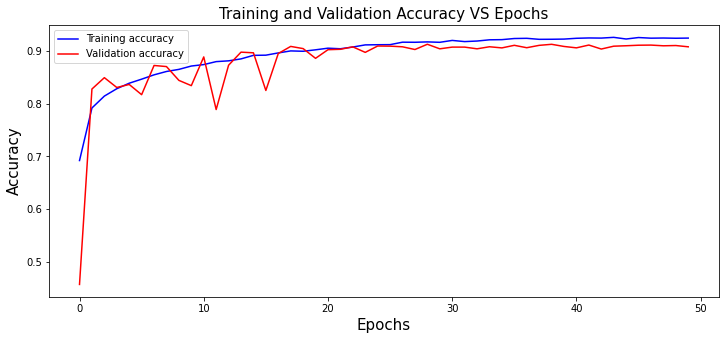

In [ ]:
accuracy = model_fitting.history['accuracy']
val_accuracy = model_fitting.history['val_accuracy']

loss = model_fitting.history['loss']
val_loss = model_fitting.history['val_loss']

epochs = range(len(accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()


#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()



## Generate predictions on test dataset

In [ ]:
# Generate predictions 

predictions = conv_ae.predict(df_test2)
print('predictions shape:', predictions.shape)

# COnvert predictions classes to integer vectors
preds = np.argmax(predictions, axis=1)
print(preds)


predictions shape: (10000, 5)
[3 4 1 ... 3 2 2]


## Create Submissions for Kaggle

In [ ]:
subm1 = pd.DataFrame(test.iloc[:,0])
subm1 = subm1.join(pd.DataFrame(data = preds, columns =['Label']))
subm1.to_csv('drive/My Drive/ECE657A/outs/cnn/conv_autoen_final.csv', index=False)

# Transfer Learning Based Approach


# **XCEPTION NET**

## Preprocess input

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input

x_train = preprocess_input(tr_x_train)
x_val = preprocess_input(tr_x_val)
df_test2 = preprocess_input(df_test2)

## Load a pretrained model

In [ ]:
xcep = Xception(include_top= False, weights= 'imagenet', input_shape= (71, 71, 3))

xcep.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 71, 71, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

## Extract Features from our dataset

In [ ]:
# Extracting features
train_features = xcep.predict(np.array(x_train), batch_size=16, verbose=1)
test_features = xcep.predict(np.array(df_test2), batch_size=16, verbose=1)
val_features = xcep.predict(np.array(x_val), batch_size=16, verbose=1)

# Current shape of features
print(train_features.shape)
print(test_features.shape)
print(val_features.shape)

12000/12000 [==============================] - 14s 1ms/step
(48000, 3, 3, 2048)
(10000, 3, 3, 2048)
(12000, 3, 3, 2048)


## Flatten the extracted features

In [ ]:
# Flatten extracted features
train_flatten = np.reshape(train_features, (48000, 3*3*2048))
test_flatten = np.reshape(test_features, (10000, 3*3*2048))
val_flatten = np.reshape(val_features, (12000, 3*3*2048))

# New shape of features
print(train_flatten.shape)
print(test_flatten.shape)
print(val_flatten.shape)

(48000, 18432)
(10000, 18432)
(12000, 18432)


## Adding Dense layers for training and validation

In [ ]:
# Add dense layers to the model

# epoch = 100

xcep = models.Sequential()
xcep.add(layers.Dense(18432, activation='relu', input_dim=(3*3*2048)))
xcep.add(layers.Dropout(0.5))

xcep.add(layers.Dense(2048, activation='relu'))
xcep.add(layers.Dropout(0.5))

xcep.add(layers.Dense(64, activation='relu'))
xcep.add(layers.Dropout(0.5))

xcep.add(layers.LeakyReLU(alpha=0.1))

xcep.add(layers.Dense(5, activation= 'softmax'))


## Compile the model

In [ ]:
# Compile the model.
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

xcep.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

## Train the Model

In [ ]:
rop = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.2,
                        patience=2,
                        verbose=1,
                        mode='auto',
                        min_delta=0.0001,
                        cooldown=2,
                        min_lr=0)

lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

# Train the the model
xception_train = xcep.fit(train_flatten, tr_y_train, epochs=30, batch_size= 128,
                    validation_data=(val_flatten, tr_y_val),
                    callbacks=[lr])

Epoch 1/30
375/375 [==============================] - 25s 68ms/step - loss: 1.5362 - acc: 0.2700 - val_loss: 1.4441 - val_acc: 0.3348 - lr: 0.0010
Epoch 2/30
375/375 [==============================] - 25s 67ms/step - loss: 1.4505 - acc: 0.3213 - val_loss: 1.4160 - val_acc: 0.3456 - lr: 9.0000e-04
Epoch 3/30
375/375 [==============================] - 25s 67ms/step - loss: 1.4284 - acc: 0.3343 - val_loss: 1.3966 - val_acc: 0.3547 - lr: 8.1000e-04
Epoch 4/30
375/375 [==============================] - 25s 67ms/step - loss: 1.4093 - acc: 0.3489 - val_loss: 1.3727 - val_acc: 0.3736 - lr: 7.2900e-04
Epoch 5/30
375/375 [==============================] - 25s 68ms/step - loss: 1.3952 - acc: 0.3582 - val_loss: 1.3609 - val_acc: 0.3836 - lr: 6.5610e-04
Epoch 6/30
375/375 [==============================] - 25s 67ms/step - loss: 1.3844 - acc: 0.3680 - val_loss: 1.3529 - val_acc: 0.3862 - lr: 5.9049e-04
Epoch 7/30
375/375 [==============================] - 25s 67ms/step - loss: 1.3732 - acc: 0.3770 -

## Plots

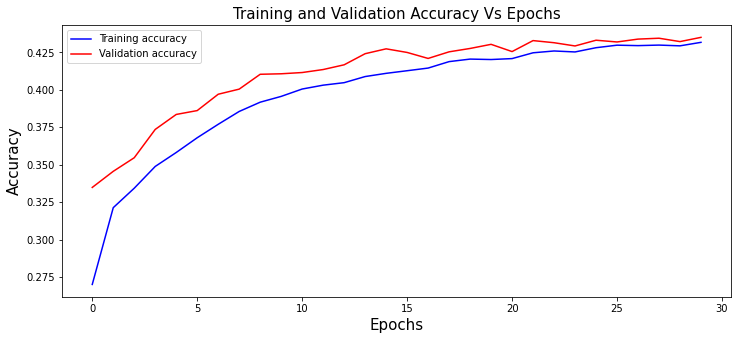

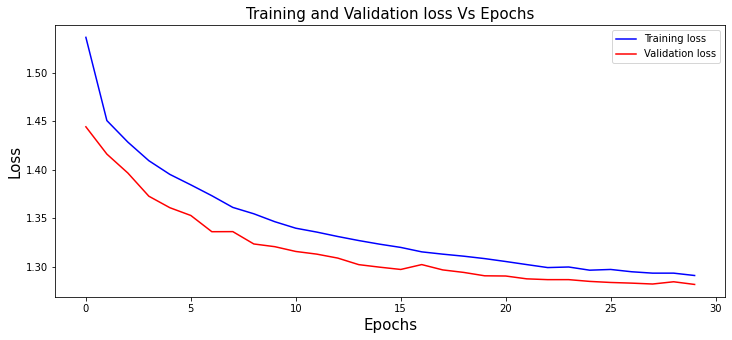

In [ ]:
accuracy = xception_train.history['acc']
val_accuracy = xception_train.history['val_acc']

loss = xception_train.history['loss']
val_loss = xception_train.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(12, 5))


plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy Vs Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()

plt.figure(figsize=(12, 5))

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation loss Vs Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()
plt.show()

# **VGG16**

## Preprocess input

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

tr_x_train = preprocess_input(tr_x_train)
tr_x_val = preprocess_input(tr_x_val)
tr_df_test2 = preprocess_input(df_test2)

## Load pretrained model

In [ ]:
vgg = VGG16(include_top= False, weights= 'imagenet', input_shape= (48, 48, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

## Extract Features

In [ ]:
# Extracting features
train_features = vgg.predict(np.array(tr_x_train), batch_size=16, verbose=1)
test_features = vgg.predict(np.array(tr_df_test2), batch_size=16, verbose=1)
val_features = vgg.predict(np.array(tr_x_val), batch_size=16, verbose=1)

# Current shape of features
print(train_features.shape)
print(test_features.shape)
print(val_features.shape)

12000/12000 [==============================] - 5s 393us/step
(48000, 1, 1, 512)
(10000, 1, 1, 512)
(12000, 1, 1, 512)


## Flatten

In [ ]:
# Flatten extracted features
train_flatten = np.reshape(train_features, (48000, 1*1*512))
test_flatten = np.reshape(test_features, (10000, 1*1*512))
val_flatten = np.reshape(val_features, (12000, 1*1*512))

# New shape of features
print(train_flatten.shape)
print(test_flatten.shape)
print(val_flatten.shape)

(48000, 512)
(10000, 512)
(12000, 512)


## Add dense layers

In [ ]:
# Add dense layers to the model

n_train = train_flatten.shape[0]
n_val = val_flatten.shape[0]
epoch = 100

vgg = models.Sequential()

vgg.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
vgg.add(layers.Dropout(0.5))

vgg.add(layers.Dense(64, activation='relu'))
vgg.add(layers.Dropout(0.5))


vgg.add(layers.LeakyReLU(alpha=0.1))

vgg.add(layers.Dense(5, activation= 'softmax'))



## Compile the model

In [ ]:
# Compile the model.
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

vgg.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

## Train the model

In [ ]:
rop = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.2,
                        patience=2,
                        verbose=1,
                        mode='auto',
                        min_detla=0.0001,
                        cooldown=2,
                        min_lr=0)

es = callbacks.EarlyStopping(monitor='val_loss',
                                        min_delta=0,
                                        patience=7,
                                        verbose=1,
                                        mode='auto')

lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

# callback = [rop, es]

# Train the the model
vgg_train = vgg.fit(train_flatten, tr_y_train, epochs=100, validation_data=(val_flatten, tr_y_val),
                    callbacks= [lr])

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4572 - acc: 0.4223 - val_loss: 0.9188 - val_acc: 0.6013 - lr: 0.0010
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0219 - acc: 0.5446 - val_loss: 0.7938 - val_acc: 0.6739 - lr: 9.0000e-04
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9233 - acc: 0.5933 - val_loss: 0.7390 - val_acc: 0.6904 - lr: 8.1000e-04
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8471 - acc: 0.6291 - val_loss: 0.7075 - val_acc: 0.7005 - lr: 7.2900e-04
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7960 - acc: 0.6531 - val_loss: 0.6698 - val_acc: 0.7209 - lr: 6.5610e-04
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7517 - acc: 0.6751 - val_loss: 0.6555 - val_acc: 0.7320 - lr: 5.9049e-04
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7201 - acc: 0

## Plots

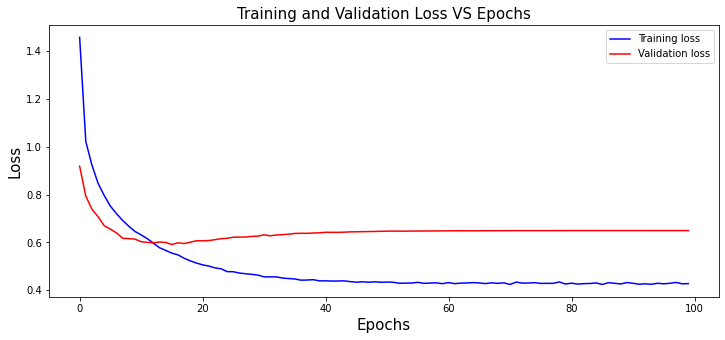

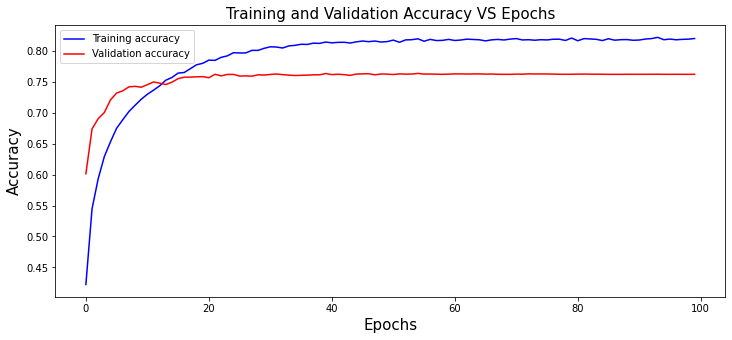

In [ ]:
accuracy = vgg_train.history['acc']
val_accuracy = vgg_train.history['val_acc']

loss = vgg_train.history['loss']
val_loss = vgg_train.history['val_loss']

epochs = range(len(accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()


#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()



# Evaluation of a CNN with other metrics

## Metric: Categorical Accuracy

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compile
cnn_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["categorical_accuracy"])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)       

In [ ]:
batches = 128
epoch = 50
lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model_fitting = cnn_model.fit(x_train, y_train, batch_size = batches, epochs = epoch, validation_data = (x_val, y_val), 
                          verbose=1, steps_per_epoch=x_train.shape[0] // batches, callbacks = [lr])

Epoch 1/50
375/375 [==============================] - 5s 13ms/step - loss: 0.8010 - categorical_accuracy: 0.6839 - val_loss: 1.0207 - val_categorical_accuracy: 0.5315 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.5257 - categorical_accuracy: 0.7865 - val_loss: 0.4463 - val_categorical_accuracy: 0.8148 - lr: 9.0000e-04
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4490 - categorical_accuracy: 0.8203 - val_loss: 0.3606 - val_categorical_accuracy: 0.8535 - lr: 8.1000e-04
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.4247 - categorical_accuracy: 0.8292 - val_loss: 0.3104 - val_categorical_accuracy: 0.8773 - lr: 7.2900e-04
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3941 - categorical_accuracy: 0.8427 - val_loss: 0.3976 - val_categorical_accuracy: 0.8344 - lr: 6.5610e-04
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3804 - 

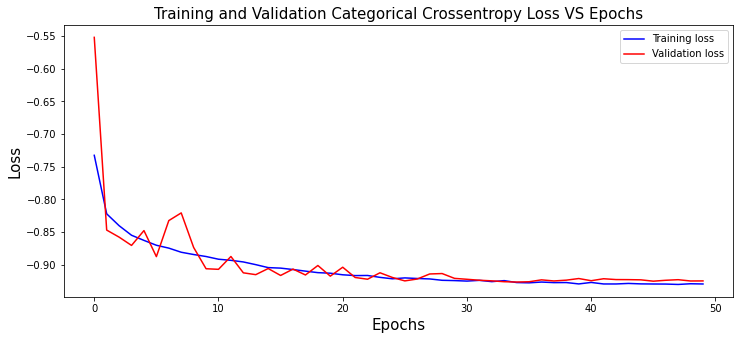

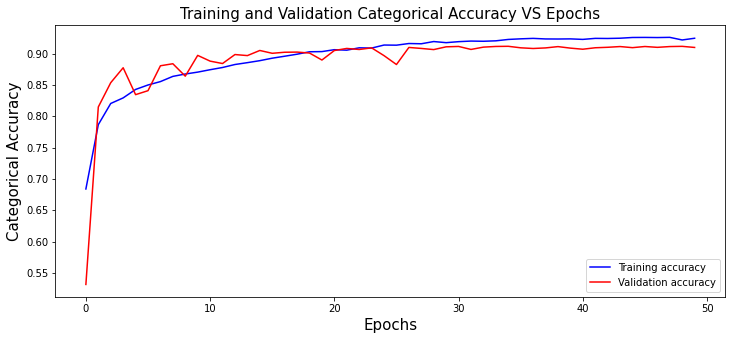

In [ ]:
# Plots
cat_accuracy = model_fitting.history['categorical_accuracy']
val_cat_accuracy = model_fitting.history['val_categorical_accuracy']

loss = model_fitting.history['loss']
val_loss = model_fitting.history['val_loss']

epochs = range(len(cat_accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Categorical Crossentropy Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, cat_accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_cat_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Categorical Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Categorical Accuracy', fontsize=15)
plt.legend()



## Metric: Cosine Proximity

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compile
cnn_model.compile(optimizer=optimizer, loss="cosine_similarity", metrics=["cosine_proximity"])

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
batches = 128
epoch = 50
lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model_fitting = cnn_model.fit(x_train, y_train, batch_size = batches, epochs = epoch, validation_data = (x_val, y_val), 
                          verbose=1, steps_per_epoch=x_train.shape[0] // batches, callbacks = [lr])

Epoch 1/50
375/375 [==============================] - 4s 11ms/step - loss: -0.7324 - cosine_proximity: 0.7324 - val_loss: -0.5518 - val_cosine_proximity: 0.5517 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: -0.8221 - cosine_proximity: 0.8221 - val_loss: -0.8470 - val_cosine_proximity: 0.8470 - lr: 9.0000e-04
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: -0.8403 - cosine_proximity: 0.8403 - val_loss: -0.8578 - val_cosine_proximity: 0.8578 - lr: 8.1000e-04
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: -0.8549 - cosine_proximity: 0.8549 - val_loss: -0.8705 - val_cosine_proximity: 0.8705 - lr: 7.2900e-04
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: -0.8628 - cosine_proximity: 0.8628 - val_loss: -0.8478 - val_cosine_proximity: 0.8479 - lr: 6.5610e-04
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: -0.8702 - cosine_proximity: 0.8702 - va

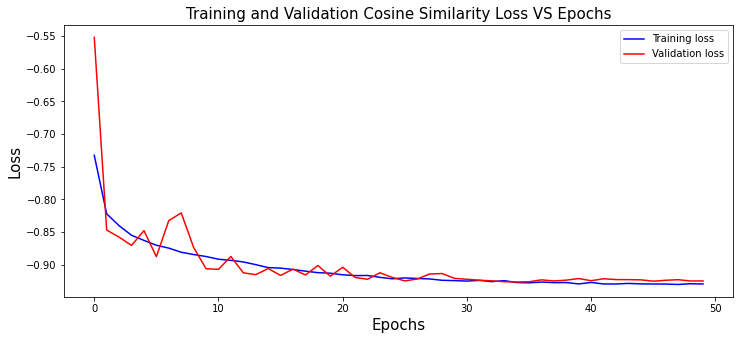

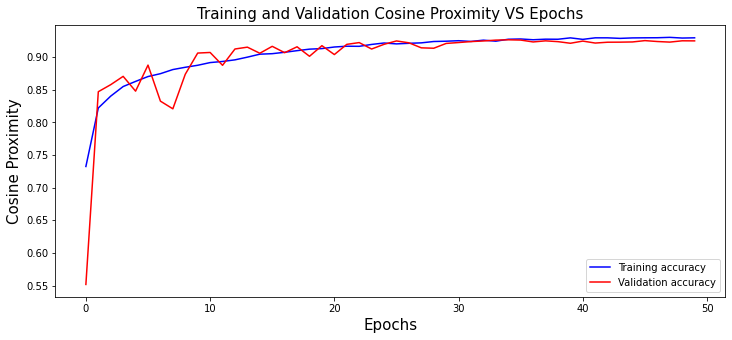

In [ ]:
# Plots
# cos_prox = model_fitting.history['cosine_proximity']
# val_cos_prox = model_fitting.history['val_cosine_proximity']

# loss = model_fitting.history['loss']
# val_loss = model_fitting.history['val_loss']

# epochs = range(len(cos_prox))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Cosine Similarity Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, cos_prox, 'b-', label='Training accuracy')
plt.plot(epochs, val_cos_prox, 'r-', label='Validation accuracy')
plt.title('Training and Validation Cosine Proximity VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Cosine Proximity', fontsize=15)
plt.legend()

